In [8]:
#Testing of Normality of a given data

# Shapiro-Wilk Test
import pandas as pd
import numpy as np
import random as random
from scipy.stats import shapiro ,norm 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
df2 = pd.read_csv('ac.csv', names = ['thickness(mm)' , 'x($mgmm^{-2}$)', 'Counting(N)', 'lnN']) 
df2

,thickness(mm),x($mgmm^{-2}$),Counting(N),lnN
0,0.05,0.135,414,6.025866
1,0.10,0.270,367,5.905362
2,0.15,0.405,274,5.613128
3,0.20,0.540,237,5.468060
4,0.25,0.675,189,5.241747
5,0.30,0.810,155,5.043425
6,0.35,0.945,175,5.164786
7,0.40,1.080,141,4.948760
8,0.55,1.485,139,4.934474
9,0.95,2.565,134,4.897840


In [9]:
# normality test
stat, p = shapiro(df2.lnN)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.892, p=0.177


# Since the p value is greater than 0.05 , we can say that the given distribution is  normal. 

In [11]:
f = df2.lnN
sd =f.std()
mu = f.mean()
a ,b = mu-3*sd, mu+3*sd
x = np.linspace(a,b,1000)
y = norm.pdf(x, loc = mu, scale = sd)

(array([2.65951276, 0.88650425, 0.88650425, 0.88650425, 0.        ,
        0.88650425, 0.88650425, 0.        , 0.88650425, 0.88650425]),
 array([4.8978398 , 5.01064242, 5.12344503, 5.23624765, 5.34905027,
        5.46185289, 5.5746555 , 5.68745812, 5.80026074, 5.91306336,
        6.02586597]),
 <a list of 10 Patch objects>)

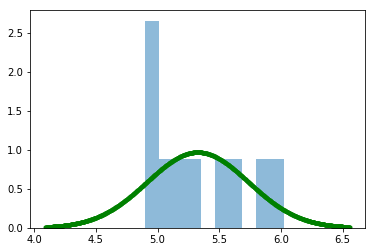

In [12]:


plt.plot(x,y,'.g')

plt.hist(f,alpha=.5, density = True) 

In [ ]:
## QQ plot

In [13]:
import statsmodels.api as sm 
import pylab as py 

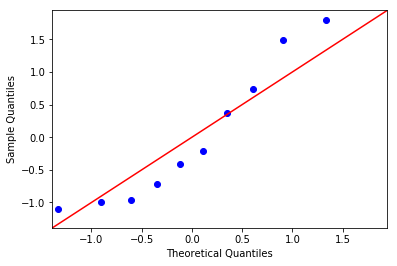

In [14]:
sm.qqplot(f, fit= True, line = "45") 
py.show() 

# Curve Fitting 

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

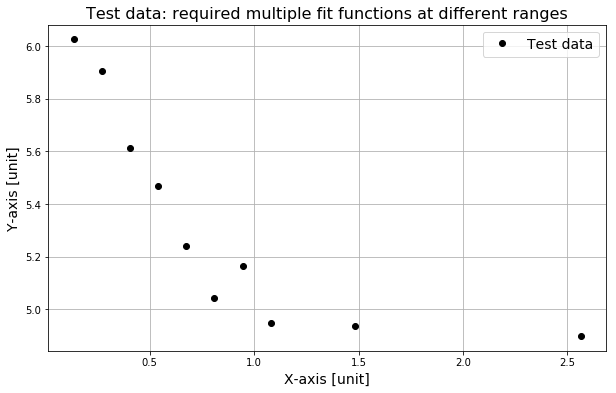

In [22]:

data = np.loadtxt("ac.csv",delimiter = ',')
#data = np.loadtxt("test4multiplot.txt", dtype = str)     #if file contains multiple data types
#data
x = data[:,1]
y = data[:,3]
#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"o", color = "black", label = "Test data")
plt.title("Test data: required multiple fit functions at different ranges", fontsize=16)
plt.xlabel('X-axis [unit]', fontsize=14)
plt.ylabel('Y-axis [unit]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)                                 # comment this if u do not need grid
plt.show()

In [23]:
def lin_fun(x,a1,a2):
    return a1*x + a2
def cos_fun(x,a3,a4,a5,a6):
    return a3*np.cos(x+a4)*np.exp(-x*a5) + a6

def exp_fun(x,a7,a8,a9):
    return a7*np.exp(-a8*x) + a9


[-0.45283117  5.72781735]
[[ 0.01600041 -0.01425637]
 [-0.01425637  0.02000428]]
a1 =  -0.4528311706044863 +- 0.12649273682358145
a2 =  5.727817352376512 +- 0.1414364767317203


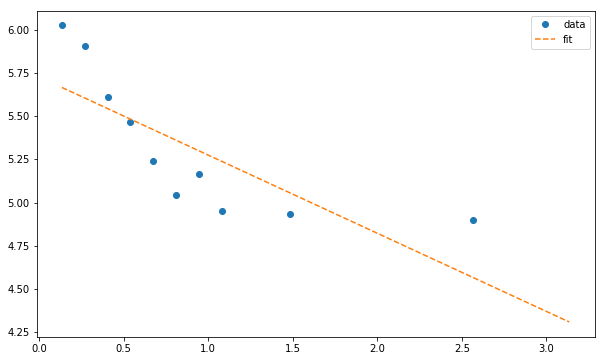

In [24]:
#curve_fit to find best fit parameters using a least square fit.
popt,pcov = curve_fit(lin_fun,x,y)
p1,p2 = popt
print(popt)
print(pcov)
print("a1 = ", popt[0], "+-", pcov[0,0]**0.5)
print("a2 = ", popt[1], "+-", pcov[1,1]**0.5)

#x1_fit = np.arange(min(x1),max(x1),1)
x1_fit = np.arange(min(x),max(x)+1.0,1)
y1_fit = lin_fun(x1_fit, p1, p2)

plt.figure(figsize = [10,6])
plt.plot(x,y,"o", label = "data")
plt.plot(x1_fit,y1_fit,"--", label = "fit")
plt.legend()

In [25]:
from numpy import cov
from scipy.stats import pearsonr

In [26]:
covariance = cov(x,y)
print(covariance)
corr , _ = pearsonr(x,y)
print("Pearson correlation : %.3f" %corr)

[[ 0.50706    -0.22961257]
 [-0.22961257  0.16888109]]
Pearson correlation : -0.785


# High level of correlation(nearly equal to -1) i.e. greater than 0.5 and a negative correlation. 

In [ ]:
#np.cov(data)
# correlation between x and y
# t test
# result significance from p value

In [ ]:
import matplotlib.pyplot as plt
from numpy import array 
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [ ]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data') 
popt, pcov = curve_fit(func, xdata, ydata)
popt
array([ 2.55423706,  1.35190947,  0.47450618])
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
array([ 2.43708906,  1.        ,  0.35015434]) 
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [ ]:
# https://github.com/dharmapaudel 